# Object Size Detection

Using PointCloud Data files for objects visually detected by a mobile manipulator robot (The LoCoBot [1] was used here).

### Necessary imports

In [1]:
import os
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Store dataset in a dictionary 

In [2]:
data_dir = 'D:/students_rosbag/luis_sizes/segmented objects'

loco_dataset = {}

for obj_type in os.listdir(data_dir):
    if os.path.isdir(os.path.join(data_dir, obj_type)):
        loco_dataset[obj_type] = []
        for instance_file in os.listdir(os.path.join(data_dir, obj_type)):
            if instance_file.endswith('.pcd'):
                # Load PCD file using Open3D
                pcd = o3d.io.read_point_cloud(os.path.join(data_dir, obj_type, instance_file))
                loco_dataset[obj_type].append(pcd)

## Explore point clouds in a 3D coordinate system

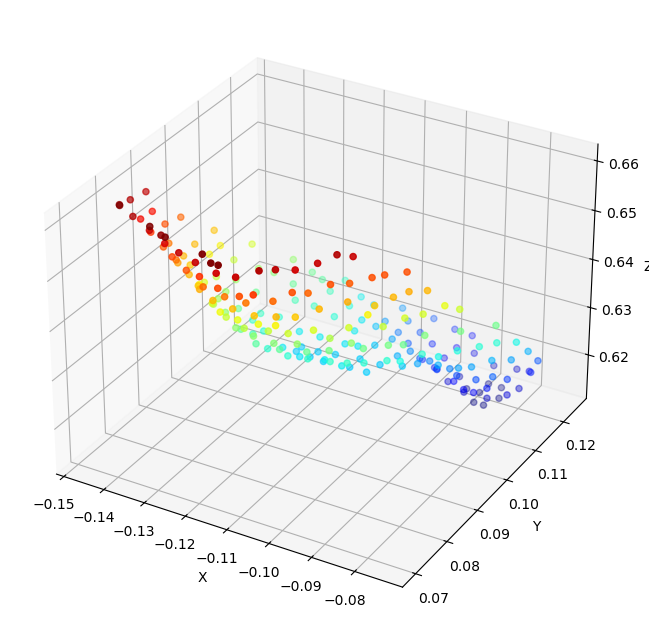

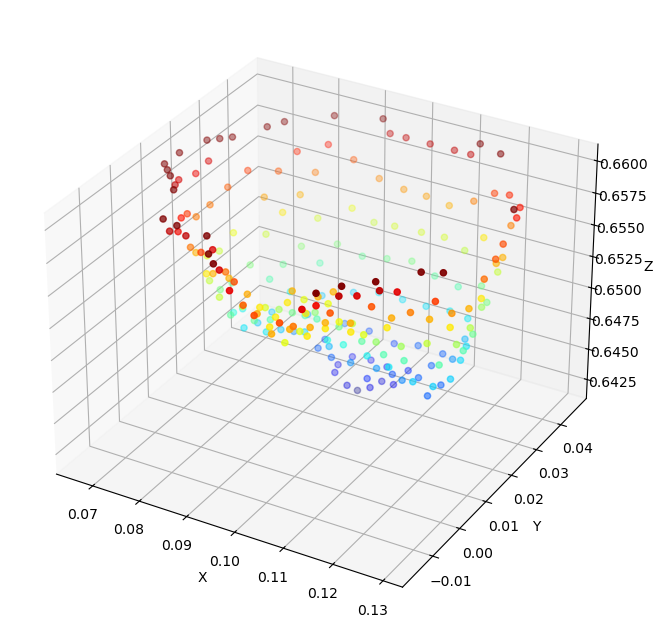

In [3]:
def explore_point_clouds(dataset, num_samples=1):
    object_types = list(dataset.keys())
    
    for obj_type in object_types:
        instances = dataset[obj_type]
        np.random.shuffle(instances)  # Random instances for each object (useful if multiple viewpoints)
        
        for instance in instances[:num_samples]:
            fig = plt.figure(figsize=(8, 8))
            ax = fig.add_subplot(111, projection='3d')
            points = np.asarray(instance.points)
            ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap='jet')
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
            plt.show()


explore_point_clouds(loco_dataset)

# 

# Compute size

In [4]:
def compute_sizes(dataset):
    object_sizes = {}

    for obj_type, instances in dataset.items():
        #total_distance = 0
        #total_points = 0
        instance_sizes = []

        for instance in instances:
            points = np.asarray(instance.points)

            distances = np.linalg.norm(points, axis=1) 
            num_points = len(points) # Number of points 
            mean_distance = np.mean(distances) # Mean distance

            s = num_points / mean_distance
            instance_sizes.append(s)
            
            #total_distance += np.sum(distances) # Accumulate total distance
            #total_points += len(points) # Accumulate total number of pixels
            
        
        mean_instance_size = np.mean(instance_sizes) # Mean size for the instance
        object_sizes[obj_type] = mean_instance_size
    
    
        #mean_distance = total_distance / total_points # Mean distance between origin and object pixels
        #object_size = total_points / mean_distance # Size of object (number of pixels / mean distance)
        #object_sizes[obj_type] = object_size

    return object_sizes

compute_sizes(loco_dataset)

{'apple': 347.40702996360295, 'banana': 353.81368895513117}

[1] Locobot: An open source low cost robot, https://locobot-website.netlify.com/, 2019.